In [208]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def get_default_plt_colors():
    return plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# set configurations for number of samples
sample_size = 100
nr_sample = 20
num_steps = 10
x_b = np.linspace(0,1,num_steps)

n_folds = 5

### Bounded distributions

In [4]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [32]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.19,0.30,0.41,0.48,0.57,0.66,0.74,0.82,1.0,arcsine
1,0.0,0.28,0.34,0.41,0.49,0.55,0.70,0.74,0.86,1.0,arcsine
2,0.0,0.20,0.31,0.40,0.49,0.51,0.59,0.65,0.69,1.0,arcsine


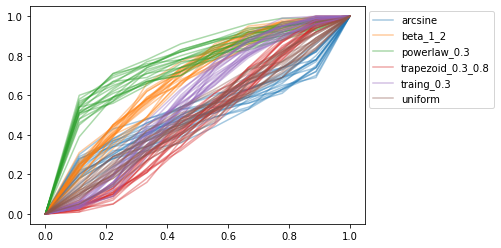

In [33]:
dem.get_edf_plot(edf_df, x_b)

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [62]:
y = np.linspace(0.01,1,1)
edf_df = dem.get_edf_v2(bounded_samples, y)
edf_df.head(3)

,0,label
0,0.000038,arcsine
1,0.000528,arcsine
2,0.000210,arcsine


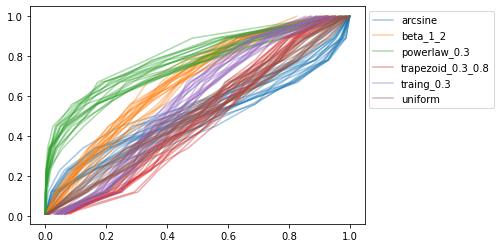

In [35]:
get_edf_plot_v2(edf_df,y)

In [25]:
def get_edf_v2(df, y):
    # df: a dataframe containing samples from different distribution
    # y:
    x = list()  # empty list to store cumulative probability
    for i in range(len(df)):
        ecdf = ECDF(df.iloc[i,:-1])
        inverse_ecdf = interp1d(ecdf.y, ecdf.x)
        x.append(inverse_ecdf(y))

    edf_df = pd.DataFrame(x)
    edf_df['label'] = df.iloc[:,-1].tolist()
    return edf_df 

In [11]:
def get_edf_plot_v2(df, y):
    names = df.iloc[:,-1].unique()
    fig, ax = plt.subplots()
    colors = get_default_plt_colors()
    handles = []
    
    for name, color in zip(names, colors):  # iterate over each distribution
        temp = df.loc[df.iloc[:,-1] == name].iloc[:, :-1].to_numpy()
        hh = ax.plot(temp.T, y, c=color, alpha=0.4, label=name)
        handles.append(hh[0] if isinstance(hh, list) else hh)
    ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1))

### SVM

In [174]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,21))

In [175]:
res_svm = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'edf', 1)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
res_svm.to_csv('results/edf/res_svm_bounded.csv')

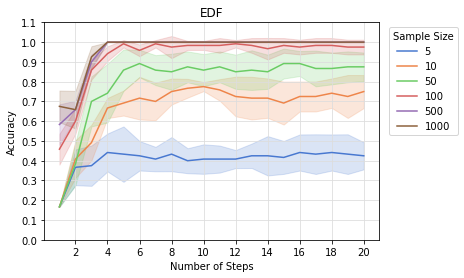

In [176]:
#new
cm.plot_cv_numsteps_samplesize(res_svm, 'EDF')

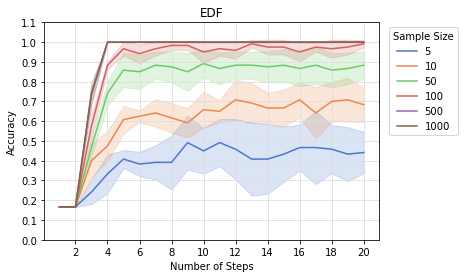

In [42]:
cm.plot_cv_numsteps_samplesize(res_svm, 'EDF')

### Logistic Regression

In [177]:
res_lr = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'edf', 2)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

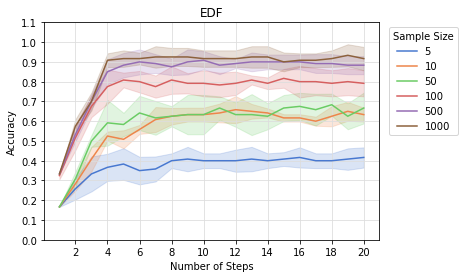

In [178]:
#new
cm.plot_cv_numsteps_samplesize(res_lr,'EDF')

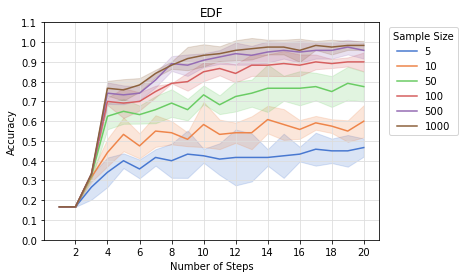

In [43]:
cm.plot_cv_numsteps_samplesize(res_lr,'EDF')

### Heavytail distributions

In [202]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [45]:
perc_95 = np.percentile(heavytail_samples.iloc[:,:-1],95)
x_h = np.linspace(0,perc_95,num_steps)
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.60,0.77,0.87,0.89,0.92,0.94,0.95,0.95,0.95,cauchy
1,0.0,0.57,0.81,0.90,0.95,0.97,0.97,0.98,0.99,0.99,cauchy
2,0.0,0.54,0.68,0.78,0.85,0.88,0.91,0.92,0.93,0.95,cauchy


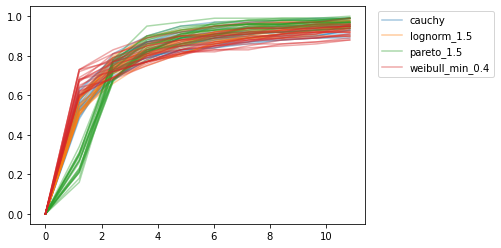

In [46]:
dem.get_edf_plot(edf_df, x_h)

In [211]:
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform=True)

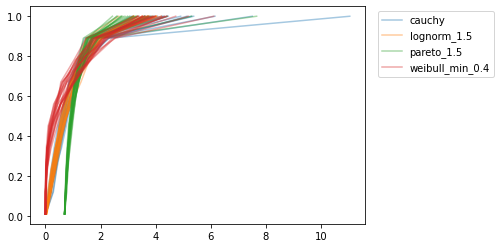

In [216]:
y = np.linspace(0.01,1,10)
edf_df = dem.get_edf_v2(heavytail_samples, y)
dem.get_edf_plot_v2(edf_df, y)

In [201]:
edf_df.loc[edf_df['label']=='cauchy']

,0,1,2,3,4,5,6,7,8,9,label
0,0.006202,0.147871,0.436877,0.561083,0.811556,1.070428,1.434925,2.464960,4.372024,51.439517,cauchy
1,0.022992,0.147839,0.281714,0.508991,0.826228,1.142965,1.329037,2.113058,3.137412,28.793792,cauchy
2,0.014485,0.194566,0.428038,0.586648,0.739533,1.306292,2.034019,3.608644,6.049556,57.435169,cauchy
3,0.015348,0.137722,0.258185,0.447530,0.852763,1.173313,1.502442,2.251371,3.858913,134.271063,cauchy
4,0.002764,0.216297,0.439761,0.653155,1.029767,1.450812,2.082394,3.191434,5.852855,35.366039,cauchy
5,0.006635,0.096796,0.223164,0.375636,0.574235,0.986942,1.424894,2.335458,3.973546,44.158780,cauchy
6,0.016306,0.169943,0.306193,0.516030,0.632554,1.161942,2.102263,3.322058,6.614638,215.593116,cauchy
7,0.016415,0.334500,0.500938,0.739593,1.008420,1.331469,1.876811,2.516917,6.905647,467.796640,cauchy
8,0.005234,0.196013,0.399694,0.642121,0.906723,1.328679,2.132853,3.679101,8.757468,168.964251,cauchy
9,0.020531,0.177740,0.286727,0.470588,0.653945,0.942716,1.593320,2.209682,4.242913,21.258260,cauchy


In [189]:
heavytail_samples.loc[heavytail_samples['label']=='pareto_1.5']

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
40,2.674127,1.014078,1.953145,2.511837,1.584249,1.185012,1.158528,2.593185,1.131457,1.063599,...,1.259808,1.045267,13.062842,1.318791,1.577007,12.393656,1.473245,1.291000,1.630735,pareto_1.5
41,1.777810,3.605510,1.048141,1.516504,2.760333,2.328735,1.800315,1.025520,1.333573,1.737022,...,2.313567,1.054935,1.166187,1.765665,1.261037,2.035781,2.959323,1.334337,1.067585,pareto_1.5
42,3.061461,2.785233,1.395535,3.790205,1.381319,1.219342,3.251002,2.432301,1.603695,1.992045,...,2.777472,1.273989,1.794637,4.075697,4.128540,1.844951,1.995417,1.039628,1.265404,pareto_1.5
43,2.191565,1.149908,2.953704,1.619439,2.570022,1.139404,1.059174,1.550555,1.651567,2.213322,...,1.196268,1.013110,1.115910,1.023260,14.471297,1.347203,3.201923,1.425166,1.214849,pareto_1.5
44,1.197312,2.688212,2.099402,2.263399,3.592759,1.635855,1.476761,1.712433,2.021201,2.817519,...,1.144560,1.013375,2.475940,1.026372,1.460916,3.285539,1.009074,1.607472,1.545539,pareto_1.5
45,1.020272,1.007692,1.308423,1.043172,1.836430,4.251358,1.424998,1.026357,1.057808,1.058631,...,1.002949,1.105589,1.263342,1.156156,1.700095,1.170161,2.731538,1.555782,1.973642,pareto_1.5
46,1.130174,5.607076,2.321794,1.118661,2.356911,1.147439,3.254343,1.157161,8.740394,1.696876,...,3.064379,1.345207,11.920844,1.384250,1.010954,1.012647,1.688284,1.477427,1.017509,pareto_1.5
47,1.358297,1.438384,1.414225,64.681572,1.120306,1.466583,1.233702,10.125526,1.811379,2.252447,...,1.263200,2.321303,1.560488,1.278558,5.383785,2.210634,1.241068,2.859138,81.430123,pareto_1.5
48,2.253026,1.536265,2.880620,1.660158,1.768035,9.571481,6.727190,1.809780,1.189890,1.577645,...,1.385990,1.148295,1.443475,2.442167,21.718632,1.048695,3.581231,2.784223,1.545119,pareto_1.5
49,1.265471,1.552997,1.394726,4.632159,1.244849,1.068509,1.597018,1.139384,1.191815,2.220358,...,1.134858,1.018417,1.189409,1.408789,1.621277,1.170320,1.127841,2.182949,1.068960,pareto_1.5


### SVM

In [209]:
res_svm_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'edf', 1, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

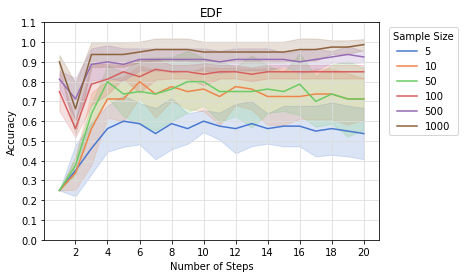

In [210]:
# new
cm.plot_cv_numsteps_samplesize(res_svm_ht,'EDF')

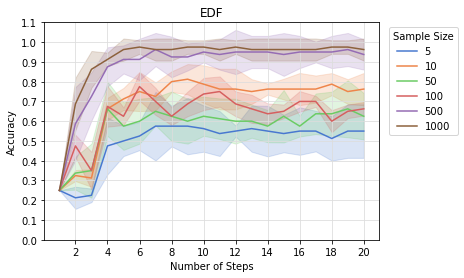

In [48]:
cm.plot_cv_numsteps_samplesize(res_svm_ht,'EDF')

### Logistic Regression

In [49]:
res_lr_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'edf', 2, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

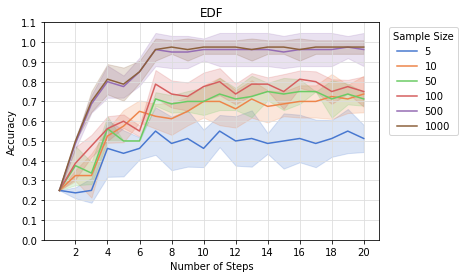

In [50]:
cm.plot_cv_numsteps_samplesize(res_lr_ht,'EDF')